In [1]:
import pandas as pd
import re
import numpy as np
import math
from pprint import pprint
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

The dataframe was read in and several minor reformatting operations were performed.

In [2]:
df = pd.DataFrame(pd.read_csv('Resources/runtime_clean.csv'))
df.head()

,Oscar Film,Oscars Won,Nominations,Year,Rated,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,imdbVotes,Box Office,IMDB,Rotten Tomatoes,Metacritic
0,Everything Everywhere All at Once,7,11,2022.0,R,139.0,"Action, Adventure, Comedy","Daniel Kwan, Daniel Scheinert","Daniel Kwan, Daniel Scheinert","Michelle Yeoh, Stephanie Hsu, Jamie Lee Curtis",A middle-aged Chinese immigrant is swept up in...,"English, Mandarin, Cantonese",United States,Won 7 Oscars. 372 wins & 357 nominations total,445131.0,77191785.0,7.8,9.3,8.1
1,All Quiet on the Western Front,4,9,2022.0,R,148.0,"Action, Drama, War",Edward Berger,"Edward Berger, Lesley Paterson, Ian Stokell","Felix Kammerer, Albrecht Schuch, Aaron Hilmer",A young German soldier's terrifying experience...,"German, French","Germany, United States, United Kingdom",Won 4 Oscars. 48 wins & 81 nominations total,205354.0,NaN,7.8,9.0,7.6
2,The Whale,2,3,2022.0,R,117.0,Drama,Darren Aronofsky,Samuel D. Hunter,"Brendan Fraser, Sadie Sink, Ty Simpkins","A reclusive, morbidly obese English teacher at...",English,United States,Won 2 Oscars. 43 wins & 116 nominations total,139972.0,17463630.0,7.7,6.4,6.0
3,Top Gun: Maverick,1,6,2022.0,PG-13,130.0,"Action, Drama",Joseph Kosinski,"Jim Cash, Jack Epps Jr., Peter Craig","Tom Cruise, Jennifer Connelly, Miles Teller","After thirty years, Maverick is still pushing ...",English,United States,Won 1 Oscar. 93 wins & 214 nominations total,590794.0,718732821.0,8.3,9.6,7.8
4,Black Panther: Wakanda Forever,1,5,2022.0,PG-13,161.0,"Action, Adventure, Drama",Ryan Coogler,"Ryan Coogler, Joe Robert Cole, Stan Lee","Letitia Wright, Lupita Nyong'o, Danai Gurira",The people of Wakanda fight to protect their h...,"English, Xhosa, Maya, Spanish, Haitian, French",United States,Won 1 Oscar. 44 wins & 154 nominations total,270203.0,453829060.0,6.7,8.4,6.7


In [3]:
df.dtypes

Oscar Film          object
Oscars Won           int64
Nominations          int64
Year               float64
Rated               object
Runtime            float64
Genre               object
Director            object
Writer              object
Actors              object
Plot                object
Language            object
Country             object
Awards              object
imdbVotes          float64
Box Office         float64
IMDB               float64
Rotten Tomatoes    float64
Metacritic         float64
dtype: object

In [4]:
df_summary = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Oscar Film       1328 non-null   object 
 1   Oscars Won       1328 non-null   int64  
 2   Nominations      1328 non-null   int64  
 3   Year             1328 non-null   float64
 4   Rated            1181 non-null   object 
 5   Runtime          1328 non-null   float64
 6   Genre            1328 non-null   object 
 7   Director         1320 non-null   object 
 8   Writer           1246 non-null   object 
 9   Actors           1295 non-null   object 
 10  Plot             1318 non-null   object 
 11  Language         1322 non-null   object 
 12  Country          1328 non-null   object 
 13  Awards           1300 non-null   object 
 14  imdbVotes        1325 non-null   float64
 15  Box Office       677 non-null    float64
 16  IMDB             1327 non-null   float64
 17  Rotten Tomatoe

In [5]:
df.count()

Oscar Film         1328
Oscars Won         1328
Nominations        1328
Year               1328
Rated              1181
Runtime            1328
Genre              1328
Director           1320
Writer             1246
Actors             1295
Plot               1318
Language           1322
Country            1328
Awards             1300
imdbVotes          1325
Box Office          677
IMDB               1327
Rotten Tomatoes     977
Metacritic          749
dtype: int64

In [6]:
df[["Oscars Won", "Runtime"]].describe()

,Oscars Won,Runtime
count,1328.000000,1328.000000
mean,1.585090,100.427711
std,1.399318,46.370165
min,0.000000,2.000000
25%,1.000000,88.000000
50%,1.000000,109.000000
75%,2.000000,127.000000
max,11.000000,467.000000


It was found that the 'Oscars Won' column had enough errors in it to skew the data, so the written award info was converted to numeric and used to repopulate the column.

In [8]:
# Extracting the number of Oscars won using regular expressions
df['Oscars Won'] = df['Awards'].str.extract(r'Won (\d+) Oscar')

# Converting the extracted values to numeric type
df['Oscars Won'] = pd.to_numeric(df['Oscars Won'])

# Displaying the DataFrame with the extracted Oscars won
df

,Oscar Film,Oscars Won,Nominations,Year,Rated,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,imdbVotes,Box Office,IMDB,Rotten Tomatoes,Metacritic
0,Everything Everywhere All at Once,7.0,11,2022.0,R,139.0,"Action, Adventure, Comedy","Daniel Kwan, Daniel Scheinert","Daniel Kwan, Daniel Scheinert","Michelle Yeoh, Stephanie Hsu, Jamie Lee Curtis",A middle-aged Chinese immigrant is swept up in...,"English, Mandarin, Cantonese",United States,Won 7 Oscars. 372 wins & 357 nominations total,445131.0,77191785.0,7.8,9.3,8.1
1,All Quiet on the Western Front,4.0,9,2022.0,R,148.0,"Action, Drama, War",Edward Berger,"Edward Berger, Lesley Paterson, Ian Stokell","Felix Kammerer, Albrecht Schuch, Aaron Hilmer",A young German soldier's terrifying experience...,"German, French","Germany, United States, United Kingdom",Won 4 Oscars. 48 wins & 81 nominations total,205354.0,NaN,7.8,9.0,7.6
2,The Whale,2.0,3,2022.0,R,117.0,Drama,Darren Aronofsky,Samuel D. Hunter,"Brendan Fraser, Sadie Sink, Ty Simpkins","A reclusive, morbidly obese English teacher at...",English,United States,Won 2 Oscars. 43 wins & 116 nominations total,139972.0,17463630.0,7.7,6.4,6.0
3,Top Gun: Maverick,1.0,6,2022.0,PG-13,130.0,"Action, Drama",Joseph Kosinski,"Jim Cash, Jack Epps Jr., Peter Craig","Tom Cruise, Jennifer Connelly, Miles Teller","After thirty years, Maverick is still pushing ...",English,United States,Won 1 Oscar. 93 wins & 214 nominations total,590794.0,718732821.0,8.3,9.6,7.8
4,Black Panther: Wakanda Forever,1.0,5,2022.0,PG-13,161.0,"Action, Adventure, Drama",Ryan Coogler,"Ryan Coogler, Joe Robert Cole, Stan Lee","Letitia Wright, Lupita Nyong'o, Danai Gurira",The people of Wakanda fight to protect their h...,"English, Xhosa, Maya, Spanish, Haitian, French",United States,Won 1 Oscar. 44 wins & 154 nominations total,270203.0,453829060.0,6.7,8.4,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,The Yankee Doodle Mouse,1.0,1,1943.0,G,8.0,"Animation, Short, Comedy","Joseph Barbera, William Hanna","William Hanna, Joseph Barbera, Cal Howard","William Hanna, Jack Sabel","In honor of the U.S. military during WWII, Tom...",English,United States,Won 1 Oscar. 1 win total,1917.0,NaN,7.7,NaN,NaN
1324,The Yearling,2.0,7,1946.0,Approved,128.0,"Drama, Family, Western",Clarence Brown,"Paul Osborn, Marjorie Kinnan Rawlings, John Le...","Gregory Peck, Jane Wyman, Claude Jarman Jr.",A boy persuades his parents to allow him to ad...,English,United States,Won 2 Oscars. 3 wins & 5 nominations total,6162.0,NaN,7.2,10.0,8.9
1325,"Yesterday, Today and Tomorrow",1.0,1,1963.0,Not Rated,119.0,"Comedy, Romance",Vittorio De Sica,"Eduardo De Filippo, Isabella Quarantotti, Albe...","Sophia Loren, Marcello Mastroianni, Aldo Giuffrè",Stories about three very different women and t...,Italian,"Italy, France",Won 1 Oscar. 8 wins & 3 nominations total,9658.0,NaN,7.2,7.8,NaN
1326,You Can't Take It with You,2.0,7,1938.0,Passed,126.0,"Comedy, Drama, Romance",Frank Capra,"Robert Riskin, George S. Kaufman, Moss Hart","Jean Arthur, James Stewart, Lionel Barrymore",The son of a snobbish Wall Street banker becom...,"English, Russian",United States,Won 2 Oscars. 2 wins & 7 nominations total,26756.0,NaN,7.8,9.5,NaN


A quick check was run to confirm that no more errors in the count were present.

In [9]:
df[df['Oscars Won']==0].count()

Oscar Film         0
Oscars Won         0
Nominations        0
Year               0
Rated              0
Runtime            0
Genre              0
Director           0
Writer             0
Actors             0
Plot               0
Language           0
Country            0
Awards             0
imdbVotes          0
Box Office         0
IMDB               0
Rotten Tomatoes    0
Metacritic         0
dtype: int64

In [10]:
df['Oscars Won'].describe()

count    1192.000000
mean        1.682886
std         1.486613
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: Oscars Won, dtype: float64

In [11]:
df[["Oscars Won", "Runtime"]].describe()

,Oscars Won,Runtime
count,1192.000000,1328.000000
mean,1.682886,100.427711
std,1.486613,46.370165
min,1.000000,2.000000
25%,1.000000,88.000000
50%,1.000000,109.000000
75%,2.000000,127.000000
max,11.000000,467.000000


In [13]:
df.drop_duplicates(subset='Oscar Film', inplace=True)

df[["Oscars Won", "Runtime"]].describe()

,Oscars Won,Runtime
count,1177.000000,1313.000000
mean,1.666950,99.967251
std,1.446155,46.309764
min,1.000000,2.000000
25%,1.000000,88.000000
50%,1.000000,109.000000
75%,2.000000,126.000000
max,11.000000,467.000000


In [54]:
df_short = df.dropna(subset=['Oscars Won'])
df_short[["Oscars Won", "Runtime"]].describe()


,Oscars Won,Runtime
count,1177.000000,1177.000000
mean,1.666950,99.523364
std,1.446155,47.640587
min,1.000000,2.000000
25%,1.000000,87.000000
50%,1.000000,109.000000
75%,2.000000,127.000000
max,11.000000,467.000000


After some more cleaning operations, a plot was generated to get a better sense of the data.

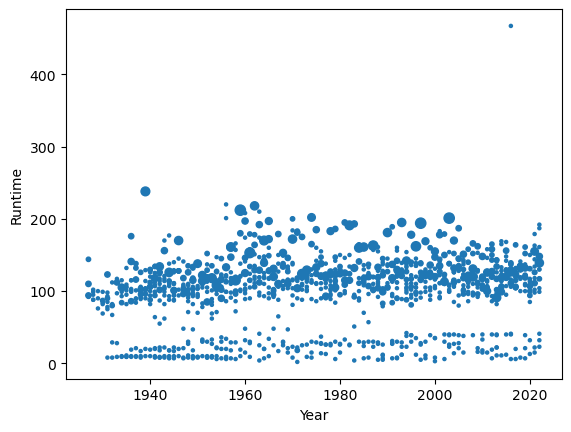

In [55]:
plot = df_short.plot.scatter(x='Year', y='Runtime', s=df_short['Oscars Won']*5)
plt.savefig('Resources/runtimes_initial')
plt.show()


A quick alternate graph was made but it was decided to pursue a different direction.

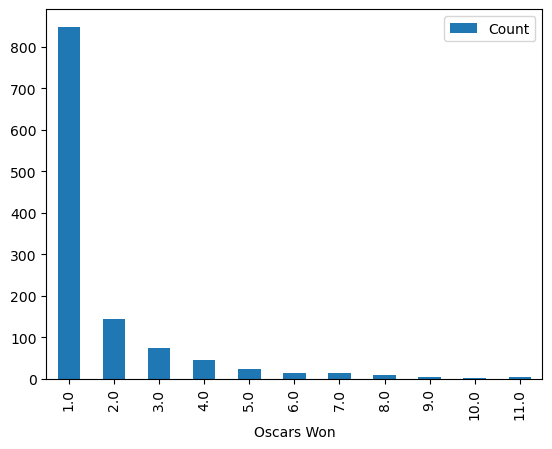

In [16]:
value_counts = df_short['Oscars Won'].value_counts().reset_index()

value_counts.columns = ['Oscars Won', 'Count']
value_counts = value_counts.sort_values('Oscars Won', ascending=True)

value_counts

plot2 = value_counts.plot.bar(x='Oscars Won', y='Count')

A boxplot was generated and quartiles assigned to check for outliers.

712       2.0
314       3.0
898       4.0
560       4.0
365       5.0
        ...  
832     212.0
1051    218.0
1240    220.0
968     238.0
96      467.0
Name: Runtime, Length: 1177, dtype: float64


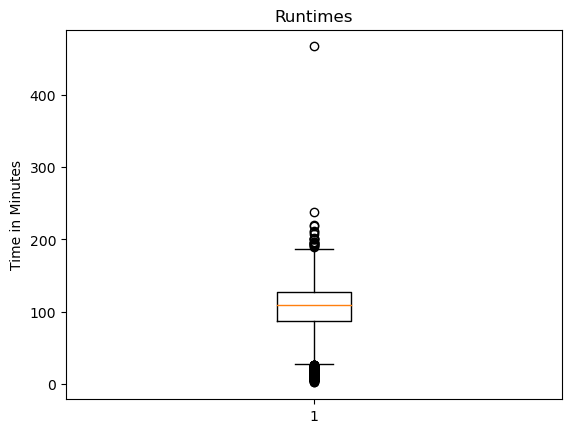

In [48]:
runtimes = df_short['Runtime'].sort_values()
print(runtimes)

fig1, ax1 = plt.subplots()
ax1.set_title('Runtimes')
ax1.set_ylabel('Time in Minutes')
ax1.boxplot(runtimes)
plt.savefig("Resources/runtimes_box")
plt.show()

In [18]:
quartiles = runtimes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of runtimes is: {lowerq}")
print(f"The upper quartile of runtimes is: {upperq}")
print(f"The interquartile range of runtimes is: {iqr}")
print(f"The median of runtimes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of runtimes is: 87.0
The upper quartile of runtimes is: 127.0
The interquartile range of runtimes is: 40.0
The median of runtimes is: 109.0 
Values below 27.0 could be outliers.
Values above 187.0 could be outliers.


Some statistics were generated, and it was concluded that the data did not follow a normal distribution.

In [19]:
print(runtimes.mean())
print(runtimes.median())
print(runtimes.mode())

99.5233644859813
109.0
0    120.0
Name: Runtime, dtype: float64


In [20]:
print(st.normaltest(runtimes.sample(100)))
print(st.normaltest(runtimes))

NormaltestResult(statistic=7.268945101351667, pvalue=0.026397854246473052)
NormaltestResult(statistic=78.4459656890394, pvalue=9.240064160191215e-18)


Given the layout of the data, it was split into two groups for more accurate analysis: shorts and features, based on a runtime of more or less than 60 minutes.

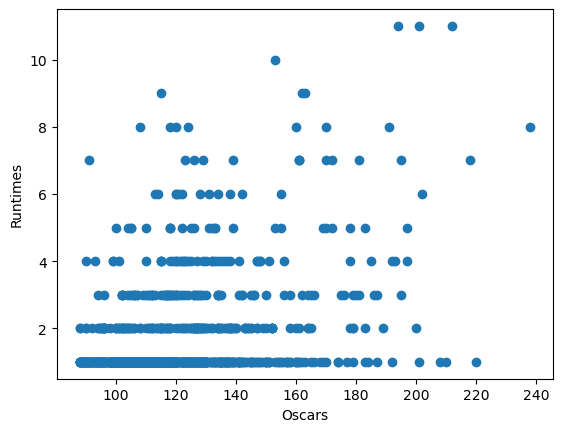

In [21]:
q1 = df_short['Runtime'].quantile(0.25)
features = df_short[df_short['Runtime'] > q1]

shorts = df_short[df_short['Runtime']< q1]

max_index = features['Runtime'].idxmax()
features = features.drop(max_index)

oscars_s = features['Oscars Won']
runtimes_s = features['Runtime']
plt.scatter(runtimes_s, oscars_s)
plt.xlabel("Oscars")
plt.ylabel("Runtimes")
plt.show()

In [22]:
print(f"The correlation coefficient between oscars and runtimes is {round(st.pearsonr(runtimes_s,oscars_s)[0],2)}")

The correlation coefficient between oscars and runtimes is 0.37


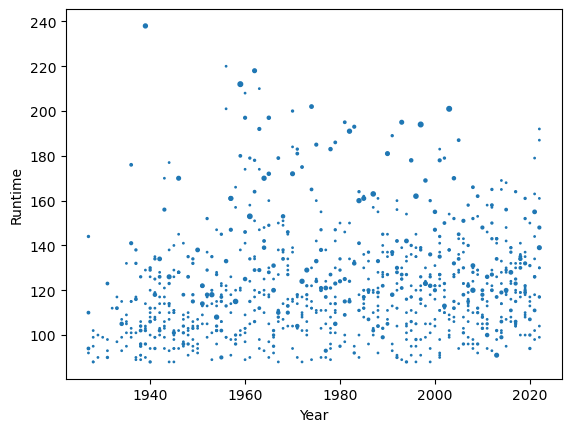

In [23]:
plot = features.plot.scatter(x='Year', y='Runtime', s=features['Oscars Won'])

In [24]:
years = features['Year']
print(f"The correlation coefficient between year and runtimes is {round(st.pearsonr(years,runtimes_s)[0],2)}")

The correlation coefficient between year and runtimes is 0.16


The r-squared is: 0.024740654277562304, and the r-value is 0.15729162176531306, while the p-value is 2.750724363451114e-06


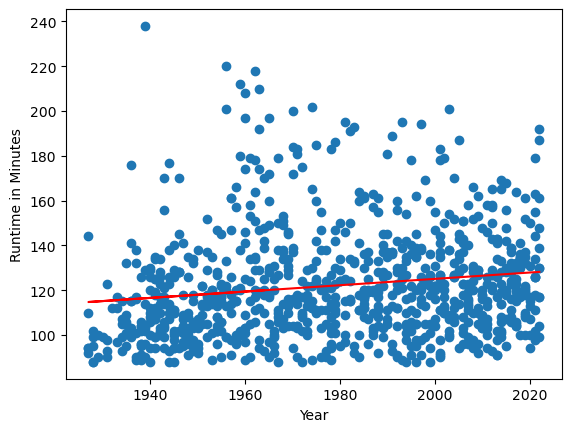

In [51]:
x_values = years
y_values = runtimes_s
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Year')
plt.ylabel('Runtime in Minutes')
print(f"The r-squared is: {rvalue**2}, and the r-value is {rvalue}, while the p-value is {pvalue}")
plt.savefig('Resources/runtimes_features')
plt.show()

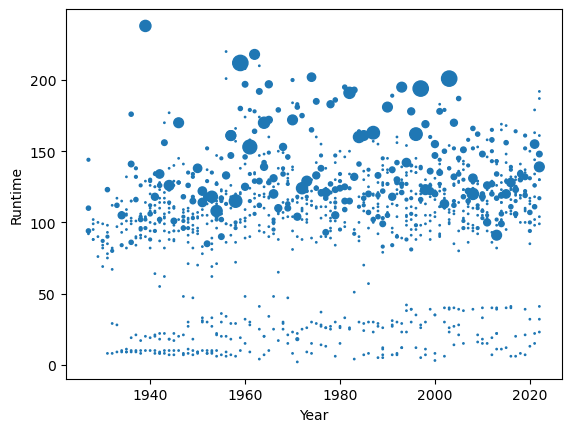

In [26]:
max_index_2 = df_short['Runtime'].idxmax()
all_df = df_short.drop(max_index_2)
plot_2 = all_df.plot.scatter(x='Year', y='Runtime', s=all_df['Oscars Won']**2)

In [27]:
plot_2.figure.savefig('scatter_plot.png')

The r-squared is: 0.07643679126365567, and the r-value is 0.2764720442714881, while the p-value is 1.1750222747523134e-05


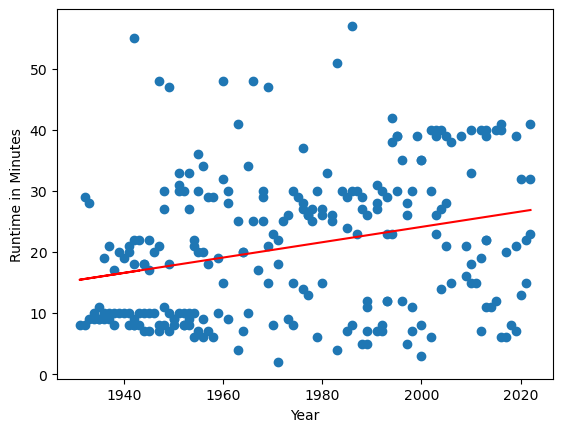

In [52]:
shorts = shorts[shorts['Runtime']< 60]
years3 = shorts['Year']
runtimes3 = shorts['Runtime']
x_values3 = years3
y_values3 = runtimes3
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x_values3, y_values3)
regress_values3 = x_values3 * slope3 + intercept3
line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))
plt.scatter(x_values3,y_values3)
plt.plot(x_values3,regress_values3,"r-")
plt.xlabel('Year')
plt.ylabel('Runtime in Minutes')
print(f"The r-squared is: {rvalue3**2}, and the r-value is {rvalue3}, while the p-value is {pvalue3}")
plt.savefig('Resources/runtimes_shorts')
plt.show()

y = 0.14x + -158.26
y = 0.13x + -226.79


<Figure size 1500x1000 with 0 Axes>

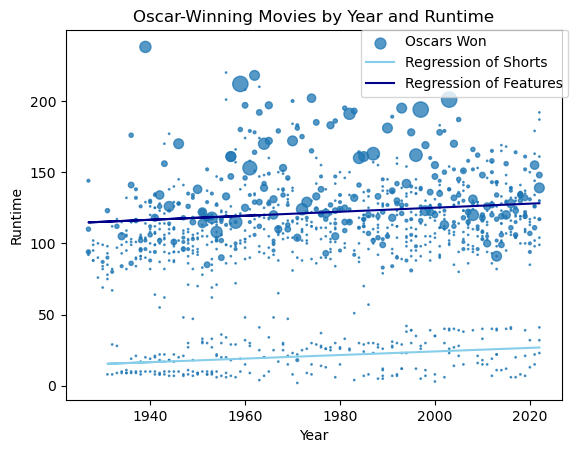

In [67]:
plt.figure(figsize=(15, 10))
plot_2 = all_df.plot.scatter(x='Year', y='Runtime', s=all_df['Oscars Won']**2, alpha=0.75, marker='o')
plt.plot(x_values3,regress_values3, color='skyblue')
plt.plot(x_values,regress_values, color='darkblue')
# print(line_eq)
# print(line_eq3)
print("\033[94m" + line_eq + "\033[0m")
print("\033[34m" + line_eq3 + "\033[0m")
plt.title("Oscar-Winning Movies by Year and Runtime")
plt.legend(['Oscars Won', 'Regression of Shorts', 'Regression of Features'], bbox_to_anchor=(0.58, 1.02), loc='upper left')
plt.savefig('Resources/runtimes_scatter_final')
plt.show()
